In [1]:
import json
import re 
import numpy as np

In [2]:

game1_score_company = {'B': {'B1': 11, 'B2': 7, 'B3': 0} ,\
                 'C': {'C1': 0, 'C2': 5, 'C3': 10, 'C4': 17}, \
                 'E': {'E1': 0, 'E2': 5, 'E3': 10, 'E4': 15, 'E5': 23}, \
                 'A': {'A1': 14, 'A2': 8, 'A3': 0}, \
                 'D': {'D1': 35, 'D2': 29, 'D3': 20, 'D4': 0}, \
                'min': 55}

game1_score_dot = {'B': {'B1': 0, 'B2': 20, 'B3': 25} ,\
                 'C': {'C1': 0, 'C2': 2, 'C3': 4, 'C4': 9}, \
                 'E': {'E1': 4, 'E2': 8, 'E3': 15, 'E4': 12, 'E5': 0}, \
                 'A': {'A1': 0, 'A2': 11, 'A3': 5}, \
                 'D': {'D1': 10, 'D2': 26, 'D3': 40, 'D4': 0}, \
                'min': 65}

game1_score_env = {'B': {'B1': 0, 'B2': 25, 'B3': 55} ,\
                 'C': {'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0}, \
                 'E': {'E1': 0, 'E2': 0, 'E3': 0, 'E4': 0, 'E5': 0}, \
                 'A': {'A1': 0, 'A2': 22, 'A3': 45}, \
                 'D': {'D1': 0, 'D2': 0, 'D3': 0, 'D4': 0}, \
                'min': 55}


game1_score_othercities = {'B': {'B1': 0, 'B2': 0, 'B3': 0} ,\
                 'C': {'C1': 12, 'C2': 8, 'C3': 6, 'C4': 0}, \
                 'E': {'E1': 60, 'E2': 45, 'E3': 30, 'E4': 15, 'E5': 0}, \
                 'A': {'A1': 0, 'A2': 4, 'A3': 10}, \
                 'D': {'D1': 0, 'D2': 8, 'D3': 13, 'D4': 18}, \
                'min': 31}


game1_score_union = {'B': {'B1': 0, 'B2': 0, 'B3': 0} ,\
                 'C': {'C1': 42, 'C2': 35, 'C3': 25, 'C4': 0}, \
                 'E': {'E1': 2, 'E2': 4, 'E3': 6, 'E4': 8, 'E5': 0}, \
                 'A': {'A1': 15, 'A2': 20, 'A3': 0}, \
                 'D': {'D1': 30, 'D2': 20, 'D3': 10, 'D4': 0}, \
                'min': 50}

game1_score_mayor = {'B': {'B1': 12, 'B2': 8, 'B3': 0} ,\
                 'C': {'C1': 24, 'C2': 18, 'C3': 12, 'C4': 0}, \
                 'E': {'E1': 0, 'E2': 2, 'E3': 4, 'E4': 7, 'E5': 10}, \
                 'A': {'A1': 14, 'A2': 8, 'A3': 0}, \
                 'D': {'D1': 40, 'D2': 30, 'D3': 23, 'D4': 0}, \
                'min': 30}



game1_parties = {'company': game1_score_company, 'DoT': game1_score_dot, 'othercities': game1_score_othercities,  'env': game1_score_env, 'union': game1_score_union, 'mayor': game1_score_mayor}

In [3]:
game1_average_scores = {'B1': 0, 'B2': 0, 'B3': 0 ,\
                 'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0, \
                 'E1': 0, 'E2': 0, 'E3': 0, 'E4': 0, 'E5': 0, \
                 'A1': 0, 'A2': 0, 'A3': 0, \
                 'D1': 0, 'D2': 0, 'D3': 0, 'D4': 0}

for party in game1_parties:
    for issue in game1_parties[party]:
        if issue == 'min': continue
        for option in game1_parties[party][issue]:
            game1_average_scores[option] += game1_parties[party][issue][option]

for option in game1_average_scores:
    game1_average_scores[option] /= 6

In [4]:
issue1_options = list(game1_score_company['A'].keys())
issue2_options = list(game1_score_company['B'].keys())
issue3_options = list(game1_score_company['C'].keys())
issue4_options = list(game1_score_company['D'].keys())
issue5_options = list(game1_score_company['E'].keys())

deals= []
def get_all_deals():
    global deals
    stack_ = []
    for issue1_option in issue1_options:
        stack_.append(issue1_option)
        for issue2_option in issue2_options:
            stack_.append(issue2_option)
            for issue3_option in issue3_options:
                stack_.append(issue3_option)
                for issue4_option in issue4_options:
                    stack_.append(issue4_option) 
                    for issue5_option in issue5_options:
                        deals.append(stack_ + [issue5_option])
                    stack_.pop()
                stack_.pop()
            stack_.pop()
        stack_.pop()
get_all_deals()

In [5]:
def calculator(scores,deal):
    deal_sum = 0
    issues = ['A','B','C','D','E']
    for i,issue in enumerate(deal):
        deal_sum += scores[issues[i]][issue]
    return deal_sum 

## Number of possible deals 

In [6]:
possible_deals = 0 
possible_deals_all = 0 

possible_per_party = {i:0 for i in game1_parties.keys()}

veto_parties = ['company','DoT']
deals_5way = []
deals_6way = []

for deal in deals:
    agree = []
    veto_covered = [False for i in range(len(veto_parties))]
    for party in game1_parties.keys():
        deal_score = calculator(game1_parties[party], deal)
        if deal_score >= game1_parties[party]['min']:
            agree.append(party)
            if party in veto_parties: veto_covered[veto_parties.index(party)] = True 
    if len(agree) >= 5 and all(veto_covered):
        possible_deals += 1
        deals_5way.append(deal)
        for party in agree: possible_per_party[party] += 1
    if len(agree) == 6:
        possible_deals_all += 1
        deals_6way.append(deal)

print(possible_deals)
print(possible_deals_all)
print(possible_per_party)

55
12
{'company': 55, 'DoT': 55, 'othercities': 47, 'env': 35, 'union': 40, 'mayor': 55}


In [7]:
deals_6way

[['A1', 'B3', 'C2', 'D2', 'E3'],
 ['A1', 'B3', 'C2', 'D2', 'E4'],
 ['A1', 'B3', 'C3', 'D2', 'E3'],
 ['A1', 'B3', 'C3', 'D3', 'E4'],
 ['A2', 'B3', 'C2', 'D2', 'E4'],
 ['A2', 'B3', 'C3', 'D1', 'E3'],
 ['A2', 'B3', 'C3', 'D2', 'E3'],
 ['A2', 'B3', 'C3', 'D2', 'E4'],
 ['A2', 'B3', 'C4', 'D1', 'E3'],
 ['A3', 'B2', 'C2', 'D2', 'E4'],
 ['A3', 'B2', 'C3', 'D2', 'E3'],
 ['A3', 'B2', 'C3', 'D2', 'E4']]

In [8]:
deals_5way

[['A1', 'B2', 'C1', 'D3', 'E4'],
 ['A1', 'B2', 'C2', 'D3', 'E3'],
 ['A1', 'B2', 'C2', 'D3', 'E4'],
 ['A1', 'B2', 'C3', 'D2', 'E3'],
 ['A1', 'B2', 'C3', 'D3', 'E2'],
 ['A1', 'B2', 'C3', 'D3', 'E3'],
 ['A1', 'B2', 'C3', 'D3', 'E4'],
 ['A1', 'B3', 'C1', 'D3', 'E5'],
 ['A1', 'B3', 'C2', 'D2', 'E3'],
 ['A1', 'B3', 'C2', 'D2', 'E4'],
 ['A1', 'B3', 'C2', 'D3', 'E5'],
 ['A1', 'B3', 'C3', 'D2', 'E3'],
 ['A1', 'B3', 'C3', 'D2', 'E4'],
 ['A1', 'B3', 'C3', 'D3', 'E4'],
 ['A1', 'B3', 'C3', 'D3', 'E5'],
 ['A1', 'B3', 'C4', 'D2', 'E2'],
 ['A1', 'B3', 'C4', 'D2', 'E3'],
 ['A1', 'B3', 'C4', 'D3', 'E2'],
 ['A1', 'B3', 'C4', 'D3', 'E3'],
 ['A2', 'B1', 'C2', 'D3', 'E4'],
 ['A2', 'B1', 'C3', 'D3', 'E3'],
 ['A2', 'B1', 'C3', 'D3', 'E4'],
 ['A2', 'B2', 'C1', 'D2', 'E4'],
 ['A2', 'B2', 'C2', 'D2', 'E3'],
 ['A2', 'B2', 'C2', 'D2', 'E4'],
 ['A2', 'B2', 'C2', 'D3', 'E4'],
 ['A2', 'B2', 'C3', 'D2', 'E2'],
 ['A2', 'B2', 'C3', 'D2', 'E3'],
 ['A2', 'B2', 'C3', 'D2', 'E4'],
 ['A2', 'B2', 'C3', 'D3', 'E3'],
 ['A2', 'B

In [9]:
proposing_entity = "company"
deals_proposing_entity = {}
for deal in deals:
    proposing_entity_score = calculator(game1_parties[proposing_entity], deal)
    if proposing_entity_score >= game1_parties[proposing_entity]['min']:
        if not proposing_entity_score in deals_proposing_entity:
            deals_proposing_entity[proposing_entity_score] = {'deals':[], "agrees":[]}
        deals_proposing_entity[proposing_entity_score]["deals"].append(deal)
        agree = 0
        for entity in game1_parties.keys():
            if entity == proposing_entity: continue 
            other_entity_score = calculator(game1_parties[entity], deal)
            if other_entity_score >= game1_parties[entity]['min']: agree += 1
        deals_proposing_entity[proposing_entity_score]["agrees"].append(agree)
            
    

In [10]:
sorted_scores = list(deals_proposing_entity.keys())
sorted_scores.sort()
mean_agree = []
std_agree = []
max_agree = []
for score in sorted_scores:
    mean_agree.append(np.mean(deals_proposing_entity[score]["agrees"]))
    std_agree.append(np.std(deals_proposing_entity[score]["agrees"]))
    max_agree.append(max(deals_proposing_entity[score]["agrees"]))

Text(0, 0.5, 'Max. agree number')

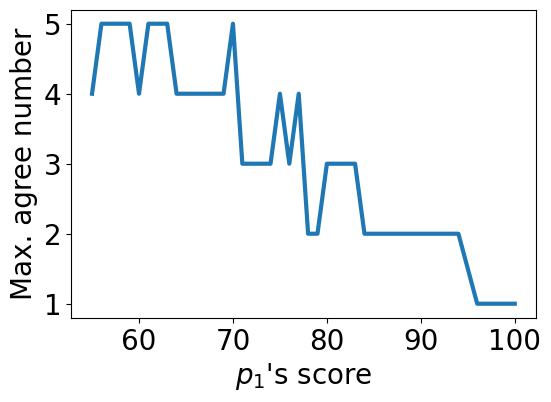

In [11]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.rcParams['lines.linewidth'] = 3
plt.rc('font', size=20)
plt.figure(figsize=(6, 4))

x = sorted_scores

ax1 = plt.subplot(111)
ax1.plot(x, max_agree)
ax1.set_xlabel(r"$p_1$'s score")
ax1.set_ylabel('Max. agree number')



